# Homework 5 - Neural Networks

This is an individual assignment.

**Due: Tuesday, April 14 @ 11:59 PM**

## Grading Rubric

1. **Problem 1 (50 pts):** you have completed all calculations and showed your work. You can upload a PDF scan of your handwritten calculations.

2. **Problem 2 (50 pts):** you have answered all questions and included the appropriate discussion. 

**Total: 100 pts**

# Multi-Layer Perceptrons and Backpropagation

In this assignment, you will explore multi-layer perceptrons, backpropagation and parameter tuning. You have been given a data set that you will need for one of the problems (**UF_network.npy**) - make sure you download it.

# Problem 2 - Learning Strategies

In this problem, you will be working with the data set "UF Network" shown below (make sure you download the file **"UF_network.npy"**):

3000

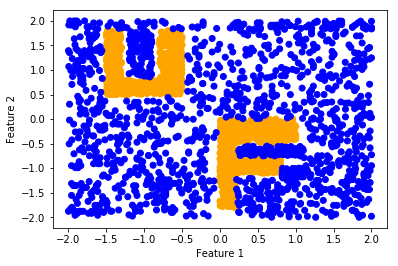

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap

UF_network = np.load('UF_network.npy')
X = UF_network[:,:2]
y = UF_network[:,2]

cm = ListedColormap(['blue', 'orange'])
plt.scatter(X[:,0],X[:,1],c=y, cmap=cm);
plt.xlabel('Feature 1')
plt.ylabel('Feature 2');
len(y)

The following function will be helpful for plotting the decision boundary of your trained model.

In [2]:
def plot_LC_and_DB(X, model):
    '''This function will plot the learning curve and decision boundary
    for a given trained model and training data X.
    model: is a sklearn model structure
    X: training data'''
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                             np.arange(y_min, y_max, 0.02))
    
    fig = plt.figure(figsize=(15,5))
    fig.add_subplot(1,2,1)
    plt.plot(model.loss_curve_)
    plt.title('Learning Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Loss Function')

    cm = ListedColormap(['blue', 'orange'])
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape) 
    fig.add_subplot(1,2,2)
    plt.contourf(xx, yy, Z, cmap=cm, alpha=.8);
    plt.title('Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show();

For this problem, you will need to create a 2-hidden layer network to distinguish the letters and the background. Starter code is provided for you in the below code cell; it is using the ```scikit-learn``` library. You will need to determine:

(1) the number of units for each hidden layer,
(2) the learning rate, and
(3) number of epochs. 

Answer the following questions:

1. How many units will you need in the first and second hidden layers? Why? Justify your answer by providing an explanation of each hidden unit role in creating the UF network.

2. Can you achieve the same goal with a *single hidden layer network*? Why or why not?

3. Using the starter code below, select three different learning rates and number of epochs. Report the results on the values selected. Generate the (a) learning curve and (b) decision boundary for the top three combinations of the different learning rates and number of epochs (total of 6 figures).

4. For the best learning rate and number epochs from the above plots, provide discussion on the (a) influence of each hyperparameter on training performance and (b) why the selected values worked well.

# Answers

Ans1:- I am taking 16 units in first hidden layer and 6 units in 2nd hidden layer. The first layer has more parameters then second layer because tanh activation in the first layer converts all the inputs in the layer 1 to either +1 or -1 and output of hidden layer two are already compressed which will be the input to layer2. First layer will be used for seperating letters from background so it require more units and 2nd hidden layer will be used for 6 different convex regions present in data.


Ans2:- No, we can't achive goal from single hidden layer. As 1 layer is used to seperate 16 decision boundaries for seperating background, but there are also 6 convex regions are there to seperate two letters U & F which can be seperated only after seperating the character from background, so we need second layer for this puprose. we can also see that data are not linearly seperable.

Ans 3:- I selected epochs as 200,10000,40000 and learning rate as 0.001,0.002,0.005. As you can see the below graphs, I got the top 3 accuracy at:-
learning | rate epochs | accuracy
0.001       40000         100%
0.002       10000         100%
0.002       40000         100%


Ans 4:- Learning rate will be used to as an amount by which our model will update its parameter. So if the learning rate is large the the model parameter will change with large amount and the learning will be unstable in this case whereas if the learning rate is small the model parameter will have smoother trajectory but the learning will also be slow. 
The number of epoch will tell the model to how many times it has to itterate through all the data. In the if we have very large epoch value then the model will memorize the data or overfit whereas if we have too small epoch value then model underfit or will not able to learn properly.

The selected values worked well because they have low learning rate and high number of epochs. This worked well because it will give smoother curve and we need higher number of epoch as our learning rate is low so that the model can converge or learn properly.

In [3]:
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

# Do not change these parameters
net = MLPClassifier(activation='tanh',
                    n_iter_no_change = 1000)

C:\Users\harsh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


-----------------------------------
Hidden Layer Architecture:  [16, 6]
Learning Rate:  0.001
Number of Epochs:  200
Accuracy =  86.4 %
-----------------------------------


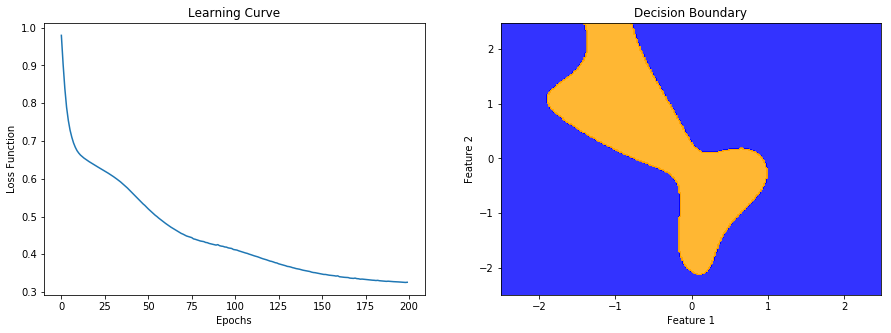

C:\Users\harsh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


-----------------------------------
Hidden Layer Architecture:  [16, 6]
Learning Rate:  0.001
Number of Epochs:  10000
Accuracy =  99.77 %
-----------------------------------


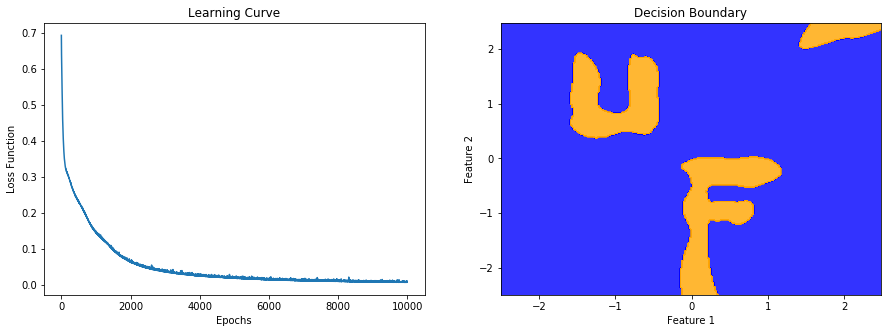

-----------------------------------
Hidden Layer Architecture:  [16, 6]
Learning Rate:  0.001
Number of Epochs:  40000
Accuracy =  100.0 %
-----------------------------------


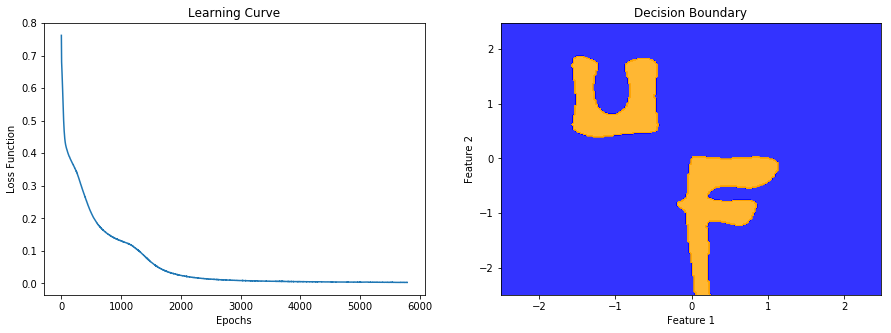

C:\Users\harsh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


-----------------------------------
Hidden Layer Architecture:  [16, 6]
Learning Rate:  0.002
Number of Epochs:  200
Accuracy =  89.9 %
-----------------------------------


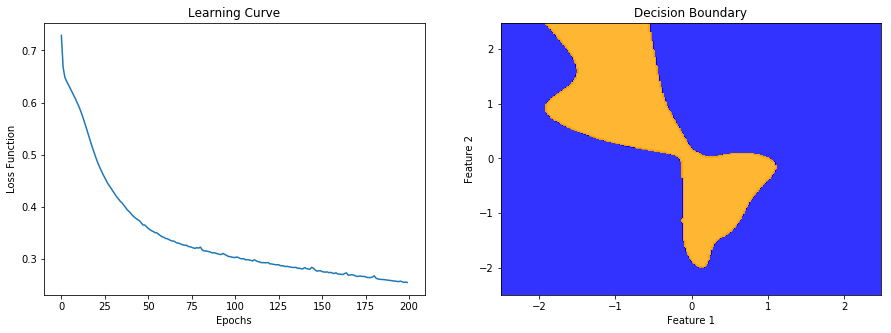

-----------------------------------
Hidden Layer Architecture:  [16, 6]
Learning Rate:  0.002
Number of Epochs:  10000
Accuracy =  100.0 %
-----------------------------------


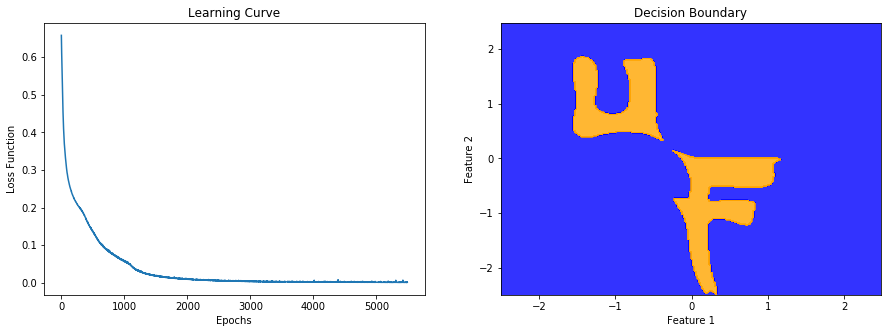

-----------------------------------
Hidden Layer Architecture:  [16, 6]
Learning Rate:  0.002
Number of Epochs:  40000
Accuracy =  100.0 %
-----------------------------------


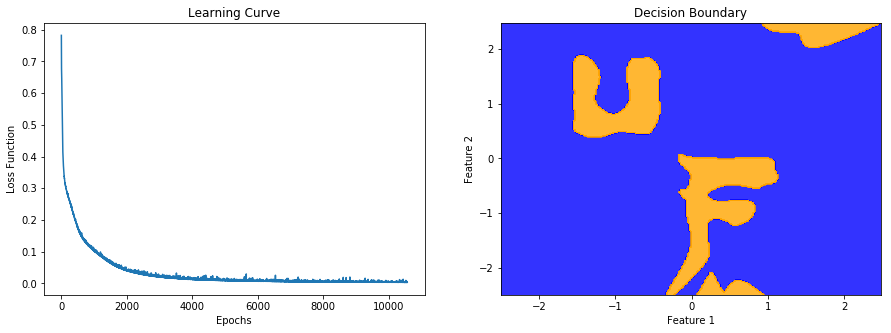

C:\Users\harsh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


-----------------------------------
Hidden Layer Architecture:  [16, 6]
Learning Rate:  0.005
Number of Epochs:  200
Accuracy =  95.43 %
-----------------------------------


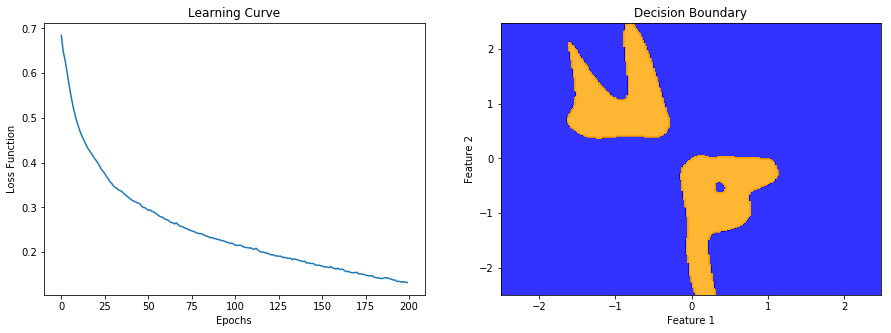

-----------------------------------
Hidden Layer Architecture:  [16, 6]
Learning Rate:  0.005
Number of Epochs:  10000
Accuracy =  100.0 %
-----------------------------------


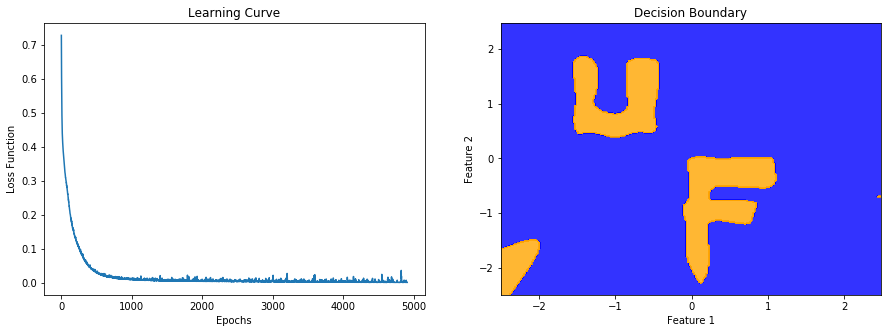

-----------------------------------
Hidden Layer Architecture:  [16, 6]
Learning Rate:  0.005
Number of Epochs:  40000
Accuracy =  99.97 %
-----------------------------------


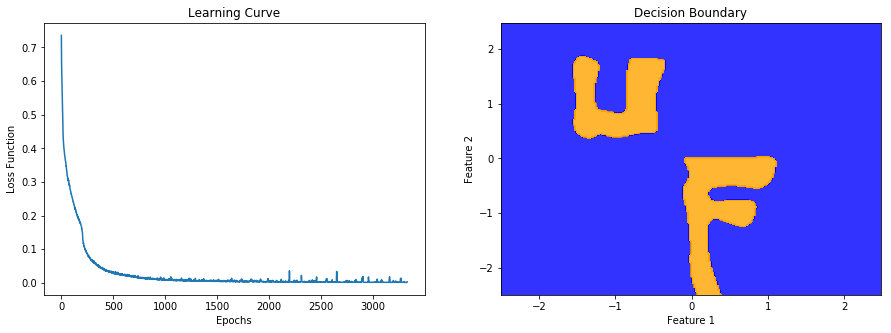

In [11]:
# Create a list with your own set of values for all of these parameters
net_hidden_layers = [[16,6]]
net_learning_rate = [0.001,0.002,0.005]
epochs = [200,10000,40000]

for i in net_hidden_layers:
    for j in net_learning_rate:
        for k in epochs:
            net.set_params(hidden_layer_sizes = i, learning_rate_init = j, max_iter = k)
            net.fit(X, y)
            y_pred = net.predict(X)

            acc_score = accuracy_score(y, y_pred)
            print('-----------------------------------')
            print('Hidden Layer Architecture: ', i)
            print('Learning Rate: ', j)
            print('Number of Epochs: ', k)
            print('Accuracy = ', np.round(acc_score*100,2),'%')
            print('-----------------------------------')
            plot_LC_and_DB(X, net)

## Submit your Solution

Create a PDF of the notebook with your solutions.

Submit both your notebook and the PDF of your notebook to Homework 4 assignment page on Canvas.

* For full credit consideration, make sure all output cells do not show any errors and all code is visible.